# Portfolio Returns Management(2)

In [1]:
# protfolio weight(self-set,equal weighted,market cap weights)

In [12]:
import pandas as pd
import numpy as np
import ssl
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
from pandas.util.testing import assert_frame_equal
import datetime as dt
import pandas_datareader.data as web
ssl._create_default_https_context = ssl._create_unverified_context

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows',30)

pd.set_option('max_colwidth',100)

ssl._create_default_https_context = ssl._create_unverified_context

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('max_colwidth',100)

In [64]:
url=r'https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv'
df=pd.read_csv(url)
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


## Self-defined portfolio

In [65]:
#define the portfolio weights as a numpy array
weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
weights

port=df.mul(weights)

# Calculate the portfolio returns
df['Portfolio'] = port.sum(axis=1)

df['Portfolio'].sum(axis=0)



0.1782414950606811

Date
2017-01-03    0.008082
2017-01-04    0.008245
2017-01-05    0.011721
2017-01-06    0.016435
2017-01-09    0.015041
Name: Portfolio, dtype: float64


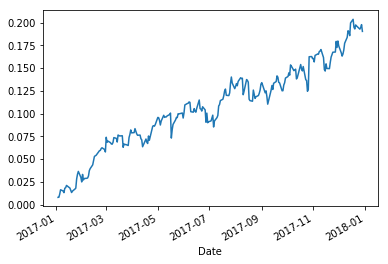

In [35]:
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+df["Portfolio"]).cumprod()-1)
print(CumulativeReturns.head())
CumulativeReturns.plot()
plt.show()

## Equal weighted portfolios

In [69]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks,numstocks)

# Calculate the equally-weighted portfolio returns
df['Portfolio_EW']= df.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
print(df['Portfolio_EW'].sum(axis=0))
df.head()

0.17199202319251633


,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_EW
Date,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.007605
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161,-0.000174
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448,0.003374
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,0.004458
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.001565


Date
2017-01-03    0.007605
2017-01-04    0.007429
2017-01-05    0.010828
2017-01-06    0.015334
2017-01-09    0.013746
Name: Portfolio_EW, dtype: float64


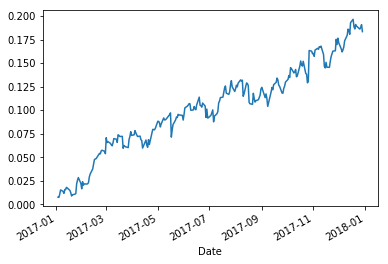

In [70]:
cumu = ((1+df["Portfolio_EW"]).cumprod()-1)
print(cumu.head())
cumu.plot()
plt.show()
# the graph is actually different

## market cap weights

In [72]:
# Create an array of market capitalizations (in billions)
market_cap = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])  

# Calculate the market cap weights
mcap = market_cap/sum(market_cap)

# Calculate the market cap weighted portfolio returns
df['Portfolio_MCap']= df.iloc[:, 0:9].mul(mcap, axis=1).sum(axis=1)
df['Portfolio_MCap'].head()

Date
2017-01-03    0.007132
2017-01-04   -0.000329
2017-01-05    0.003903
2017-01-06    0.006068
2017-01-09   -0.000478
Name: Portfolio_MCap, dtype: float64

Date
2017-01-03    0.007132
2017-01-04    0.006801
2017-01-05    0.010730
2017-01-06    0.016863
2017-01-09    0.016376
Name: Portfolio_MCap, dtype: float64


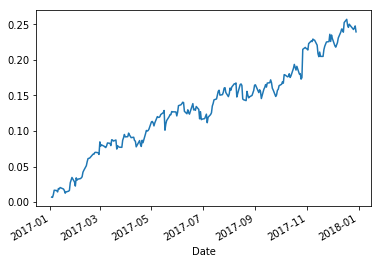

In [44]:
mcap= ((1+df["Portfolio_MCap"]).cumprod()-1)
print(mcap.head())
mcap.plot()

# the graph is actually different

## Linear historical relationship between the returns of multiple assets

In [45]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)
                        

                    AAPL      MSFT       XOM       JNJ       JPM      AMZN  \
AAPL            1.000000  0.437430  0.055505  0.038432  0.199914  0.509472   
MSFT            0.437430  1.000000  0.084108  0.230215  0.191248  0.621096   
XOM             0.055505  0.084108  1.000000  0.121012  0.305926  0.015118   
JNJ             0.038432  0.230215  0.121012  1.000000  0.070328  0.052781   
JPM             0.199914  0.191248  0.305926  0.070328  1.000000  0.013919   
AMZN            0.509472  0.621096  0.015118  0.052781  0.013919  1.000000   
GE              0.006766 -0.044827  0.193861  0.067930  0.257401 -0.092188   
FB              0.542367  0.543341 -0.046813  0.079391  0.095245  0.653030   
T               0.005082 -0.021079  0.197576  0.091622  0.252832 -0.017909   
Portfolio       0.653436  0.679864  0.290478  0.232015  0.462009  0.663011   
Portfolio_EW    0.641583  0.663890  0.350082  0.309194  0.504123  0.649387   
Portfolio_MCap  0.752686  0.723712  0.299451  0.273830  0.441217

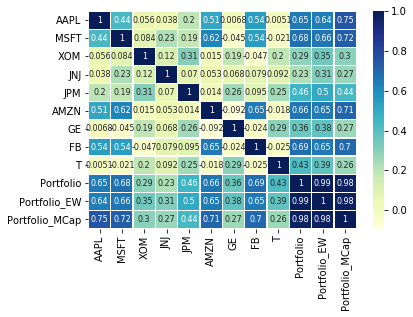

In [47]:
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [53]:
df=df.drop(['Portfolio','Portfolio_EW','Portfolio_MCap'] ,axis=1)

### Stock up some juice of [Covariance matrix](https://www.cnblogs.com/chaosimple/p/3182157.html) (Only Chinese version)

In [55]:
# Calculate the covariance matrix
cov_mat = df.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

## portfolio volatility

In [61]:
# Import numpy as np
import numpy as np

# Calculate the portfolio standard deviation
weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
volatility = np.sqrt(np.dot(weights.T, np.dot(cov_mat_annual, weights)))
print(volatility)

numstocks = 9

# Create an array of equal weights across all assets
ew = np.repeat(1/numstocks,numstocks)

volatility1 = np.sqrt(np.dot(ew.T, np.dot(cov_mat_annual, ew)))
print(volatility1)


market_cap = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])
mcap = market_cap/sum(market_cap)
volatility2= np.sqrt(np.dot(mcap.T, np.dot(cov_mat_annual, mcap)))
print(volatility2)


0.08931417642713807
0.08402023049667981
0.0899031735727904


## Sharpe ratios

In [79]:
risk_free=0


# Compare these three portfolio 

In [73]:
print(df['Portfolio'].sum(axis=0))
print(df['Portfolio_EW'].sum(axis=0))
print(df['Portfolio_MCap'].sum(axis=0))

0.1782414950606811
0.17199202319251633
0.21872635685217753


In [77]:
combine=pd.DataFrame({'Return':[0.1782414950606811,
0.17199202319251633,
0.21872635685217753],'Volatility':[0.08931417642713807,
0.08402023049667981,
0.0899031735727904]})
combine

,Return,Volatility
0,0.178241,0.089314
1,0.171992,0.084020
2,0.218726,0.089903


In [ ]:
# Calculate the Sharpe Ratio for each asset
df['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

In [83]:
# Calculate the Sharpe Ratio for each asset
combine['Sharpe'] = (combine['Return'] - risk_free) / combine['Volatility']
print(combine)
# Print the range of Sharpe ratios
print(combine['Sharpe'].describe()[['min', 'max']])

# Sort the portfolios by Sharpe ratio
sorted = combine.sort_values(by=['Sharpe'], ascending=False)
sorted

     Return  Volatility    Sharpe
0  0.178241    0.089314  1.995669
1  0.171992    0.084020  2.047031
2  0.218726    0.089903  2.432910
min    1.995669
max    2.432910
Name: Sharpe, dtype: float64


,Return,Volatility,Sharpe
2,0.218726,0.089903,2.432910
1,0.171992,0.084020,2.047031
0,0.178241,0.089314,1.995669


## Capital Assest Price Model

In [84]:
url=r'https://assets.datacamp.com/production/repositories/1546/datasets/3d9b734fea954b629d2477ef48c36525dfecf6e0/FamaFrenchFactors.csv'
capm=pd.read_csv(url)
capm.head()


,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2,2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
3,2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
4,2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


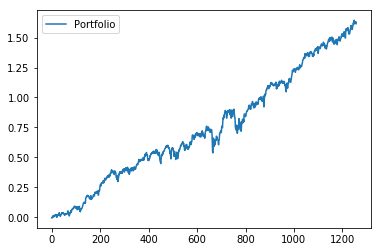

In [91]:
# Plot returns vs excess returns
CumulativeReturns = ((1+capm[['Portfolio']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [90]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
cov_matrix = capm[['Portfolio', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = cov_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
market_var = capm['Market_Excess'].var()
print(market_var)

# Calculating the portfolio market beta
beta = covariance_coefficient/market_var
print(beta)

5.726320572793939e-05
5.8803350882118946e-05
0.9738085477940358


In [94]:
# Import statsmodels.formula.api
import statsmodels.api as sm


In [107]:
CAPM_model = smf.OLS(capm['Market_Excess'],capm['Portfolio'])

In [113]:
# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params
regression_beta 

0.7954919401726733


Portfolio    0.815179
dtype: float64